# Proxyflow demo : Fault scenarios selection

Now we present simulations in faulted zones, that are ruled by another class, SimWithFault. We first start by instantiating one scenario (= one fault scenario and one well location). Then, we compute the cross comparison between all the fault scenarios for one well location.

In this synthetic case, we chose to represent 3 faults. A simplified modelisation of faults conductivity is to assume that they can behave as a path (enhanced conductivity) or a barrier (reduced conductivity) for the contaminant. This leads us to $2^3 = 8$ fault scenarios.
 
To ensure variability of the results, we also choose 10 different locations of sources.
In the end, we have 80 different scenarios. Each scenario has an id, and in this case the place digit coresponds to the source location, the tens number to the fault scenario.


In [1]:
### IMPORTS
import sys
sys.path.append('..')
import os
current_path = os.getcwd()
folder = os.path.abspath(os.path.join(current_path, os.pardir))
from classes.graph_simulation import SimWithFault
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
parameters = {'location_array':np.array([[2011.8216247 , 2950.46369633,  512.5       ], ## coordinates of the 10 different source locations
       [1644.15961272, 2948.64944714,  512.5       ],
       [1811.83145201, 2423.32644897,  512.5       ],
       [2327.70259382, 2409.19913637,  512.5       ],
       [2049.59368767, 2027.55911324,  512.5       ],
       [2253.51310867, 2538.14331322,  512.5       ],
       [1829.7317165 , 2788.42870343,  512.5       ],
       [1803.19482929, 2453.49788948,  512.5       ],
       [1634.04169725, 2403.11298645,  512.5       ],
       [1703.45524068, 2262.31334044,  512.5       ]])}
#SIMULATION PARAMETERS 
generate_MG_realisations = False 
run_modflow = True
build_graph = True



In [2]:
sim = SimWithFault(data_path=os.path.join(folder,'data/fault_sim'), parameters_dict =parameters)
print('#########################')
print('The different fault scenarios (1 corresponds to a preferential path, -1 to a barrier)')
print(sim.parameters_dict['fault_array'])
print('#########################')
scenario = sim.instantiate_scenario(46) ##we instantiate scenario 46 (source location 6, fault scenario 4)
if generate_MG_realisations:
    sim.generate_MGS() #generates the MG realisations for all the 50 scenarios
sim.generate_K_field(scenario)
sim.generate_sim_data()
if run_modflow:
    sim.run_MODFLOW(scenario)
sim.load_hydro_data(scenario)


#########################
The different fault scenarios (1 corresponds to a preferential path, -1 to a barrier)
[[-1 -1 -1]
 [-1 -1  1]
 [-1  1 -1]
 [ 1 -1 -1]
 [-1  1  1]
 [ 1  1 -1]
 [ 1 -1  1]
 [ 1  1  1]]
#########################
2024-07-31 09:20:36.377828 - MF6 RUN SCENARIO 46
writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package ims_-1...
  writing ims package ims_0...
  writing package sim_46.gwfgwt...
  writing model faulted_gwf_46...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package chd_0...
    writing package npf...
    writing package wel-1...
    writing package oc...
  writing model faulted_gwt_46...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package adv...
    writing package dsp...
    writing package mst...
    writing package ssm...
    writing package oc...
FloPy is using the following executable to r

In [3]:
### Building graph 
if build_graph:
    sim.build_graph(scenario)
sim.load_graph(scenario)

2024-07-31 09:37:24.256131 BUILDING GRAPH
Running topological_analysis version 0.1.19


C:\Users\00102908\Anaconda3\envs\proxyflow\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\00102908\Anaconda3\envs\proxyflow\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\00102908\Anaconda3\envs\proxyflow\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

2024-07-31 09:39:17.071930 GRAPH BUILT


We can visualise faults and source locations

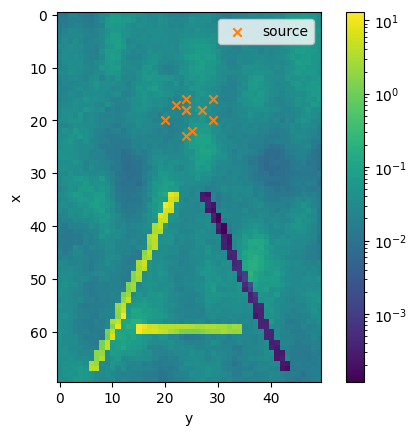

In [4]:
plt.imshow(np.sum(scenario.realK, axis = 2), norm=colors.LogNorm())
plt.colorbar()
plt.xlabel('y')
plt.ylabel('x')
plt.scatter(sim.parameters_dict['location_array'][:,1]//sim.dy,sim.parameters_dict['location_array'][:,0]//sim.dx, c= 'C1', marker = 'x', label = 'source')
plt.legend()

Now, we can execute the main function exactly as the precedent case.

In [5]:
sim.main(scenario, build_graph = build_graph, run_MODFLOW = run_modflow )

2024-07-31 09:39:20.167651 - MF6 RUN SCENARIO 46
writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package ims_-1...
  writing ims package ims_0...
  writing package sim_46.gwfgwt...
  writing model faulted_gwf_46...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package chd_0...
    writing package npf...
    writing package wel-1...
    writing package oc...
  writing model faulted_gwt_46...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package adv...
    writing package dsp...
    writing package mst...
    writing package ssm...
    writing package oc...
FloPy is using the following executable to run the model: C:\Users\00102908\utilities\mf6.3.0\bin\mf6.EXE
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.3.0 03/04/2022

   MODFLOW

C:\Users\00102908\Anaconda3\envs\proxyflow\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\00102908\Anaconda3\envs\proxyflow\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\00102908\Anaconda3\envs\proxyflow\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

2024-07-31 09:53:47.288398 GRAPH BUILT
2024-07-31 09:53:47.987500 - COMPUTING DIJKSTRA WITH IGRAPH
2024-07-31 09:53:48.648774 - DIJKSTRA COMPUTED
2024-07-31 09:53:48.648774 - END


Visualisation in 3D, see how both dijkstra paths and concentration are attracted by high conductivity pathways  :

In [6]:
# sim.plot_graph_3D(scenario, visu = 'notebook')

Fault selection scenarios is ruled by CrossComparison class. We are going to explore the different fault scenarios for source location 6. We first start to carry outh both MODFLOW and Dijkstra computations for all of them.

In [7]:
from classes.fault_recognition import  CrossComparison
sim = CrossComparison(data_path='../data/fault_sim', parameters_dict =parameters)
scenario_ids = [6,16,26,36,46,56,66,76]
sim.parallel_computation(scenario_ids, generate_K_field = True, run_MODFLOW = run_modflow, build_graph = build_graph)

[None, None, None, None, None, None, None, None]

Looking at the variability of the distances and cumulative mass distributions as a function of the fault scenarios, for the source location.

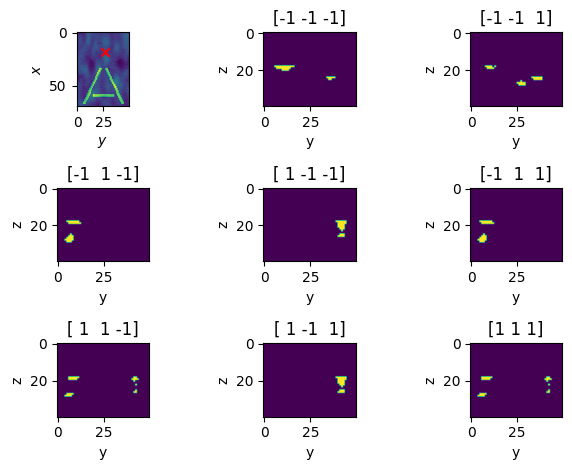

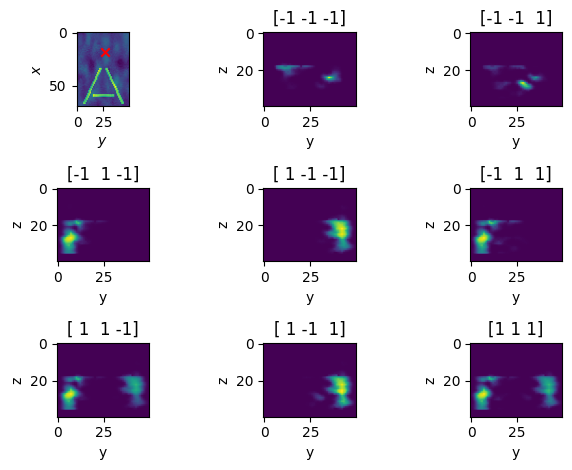

In [8]:
_ = sim.show_variability(6, show = 'distance')
_ = sim.show_variability(6, show = 'mass')

Cross similarity scores between the cumulative mass of scenario 46 and the distances of scenarios 6, 16, 36, 46, 56, 66 and 76.

{0: 0.1271011860914565,
 1: 0.15346206414847455,
 2: 0.7841102048574116,
 3: 0.04617226492455618,
 4: 0.7841102048574116,
 5: 0.2904820502372428,
 6: 0.04617226492455618,
 7: 0.2904820502372428}

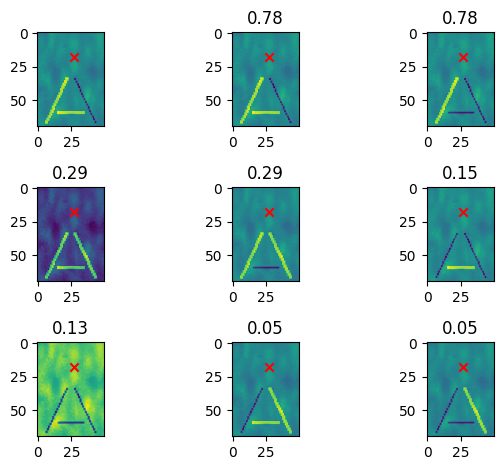

In [9]:
sim.compute_cross_comparison(scenario)

In [10]:
scenario_ids

[6, 16, 26, 36, 46, 56, 66, 76]